In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',10000)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [28]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords

import re
import string

### Documents Cleanup for Metadata

In [29]:
df = pd.read_csv('data/article_info_6000.csv')

In [30]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [31]:
df.dropna(subset=['title','description'],inplace=True)

In [32]:
df.head()

,content,description,publishedAt,source,title,url
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",2018-11-04T03:58:49Z,Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",2018-11-06T06:06:33Z,Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",2018-11-05T04:51:58Z,Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,2018-11-07T13:42:30Z,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",2018-11-08T11:16:43Z,Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11


In [33]:
df['publish_date'] = df.publishedAt.apply(lambda x: x.split('T')[0])
df.head()

,content,description,publishedAt,source,title,url,publish_date
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",2018-11-04T03:58:49Z,Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",2018-11-06T06:06:33Z,Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",2018-11-05T04:51:58Z,Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ,2018-11-05
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,2018-11-07T13:42:30Z,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html,2018-11-07
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",2018-11-08T11:16:43Z,Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11,2018-11-08


In [34]:
date_counts = df.publish_date.value_counts()

In [35]:
date_counts.set_axis(pd.to_datetime(date_counts.index),inplace=True)

In [36]:
date_counts.sort_index(axis=0,inplace=True)

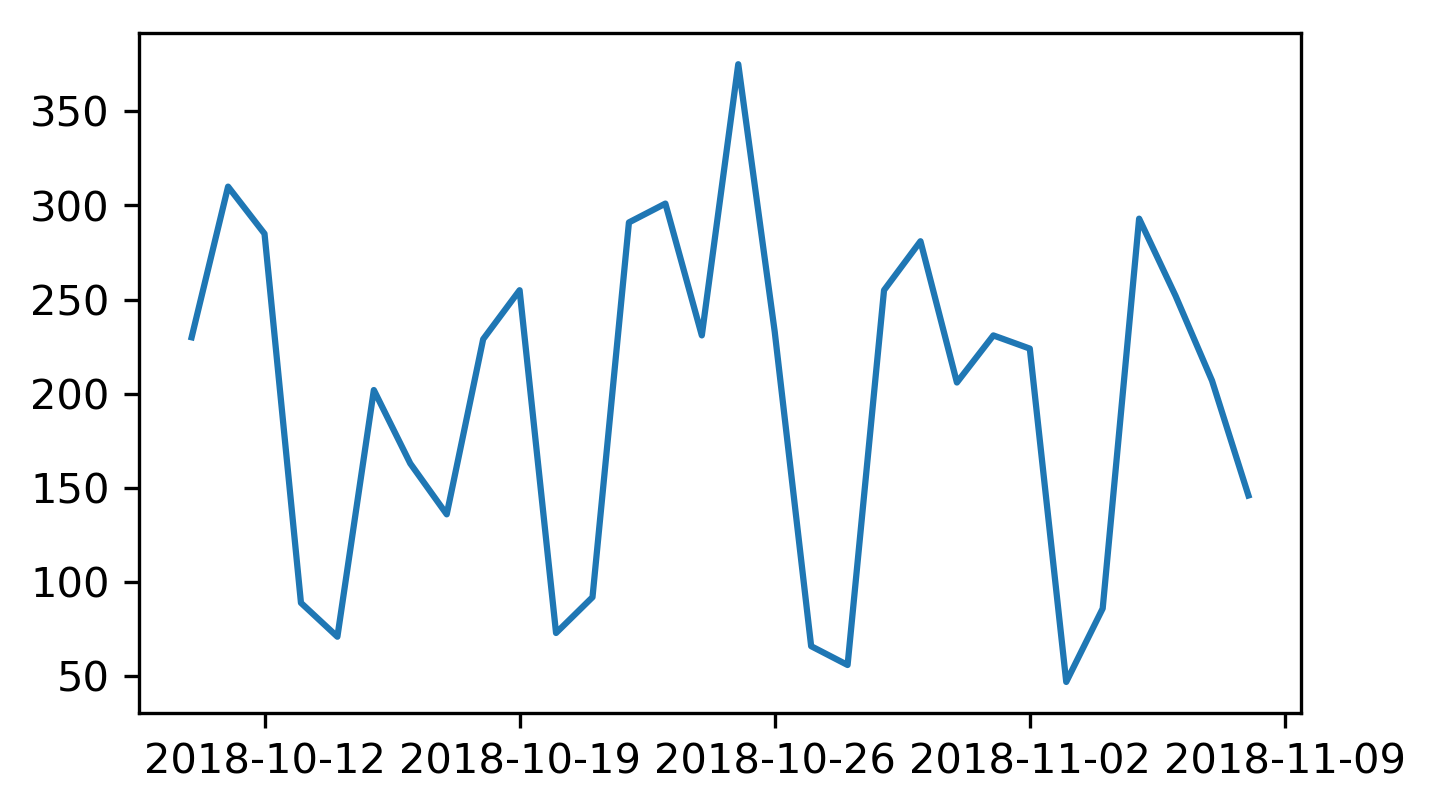

In [37]:
# Plot number of published articles' trend over time
plt.figure(figsize=(5,3),dpi=300)
plt.plot(date_counts.index, date_counts, );

In [38]:
df.drop('publishedAt',axis=1,inplace=True)

In [39]:
df.head()

,content,description,source,title,url,publish_date
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ,2018-11-05
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html,2018-11-07
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11,2018-11-08


In [40]:
source_counts = df.source.value_counts()
small_media = source_counts[source_counts < 10].index.format()
df.loc[df.source.apply(lambda x: x in small_media), 'source'] = 'Small Media'

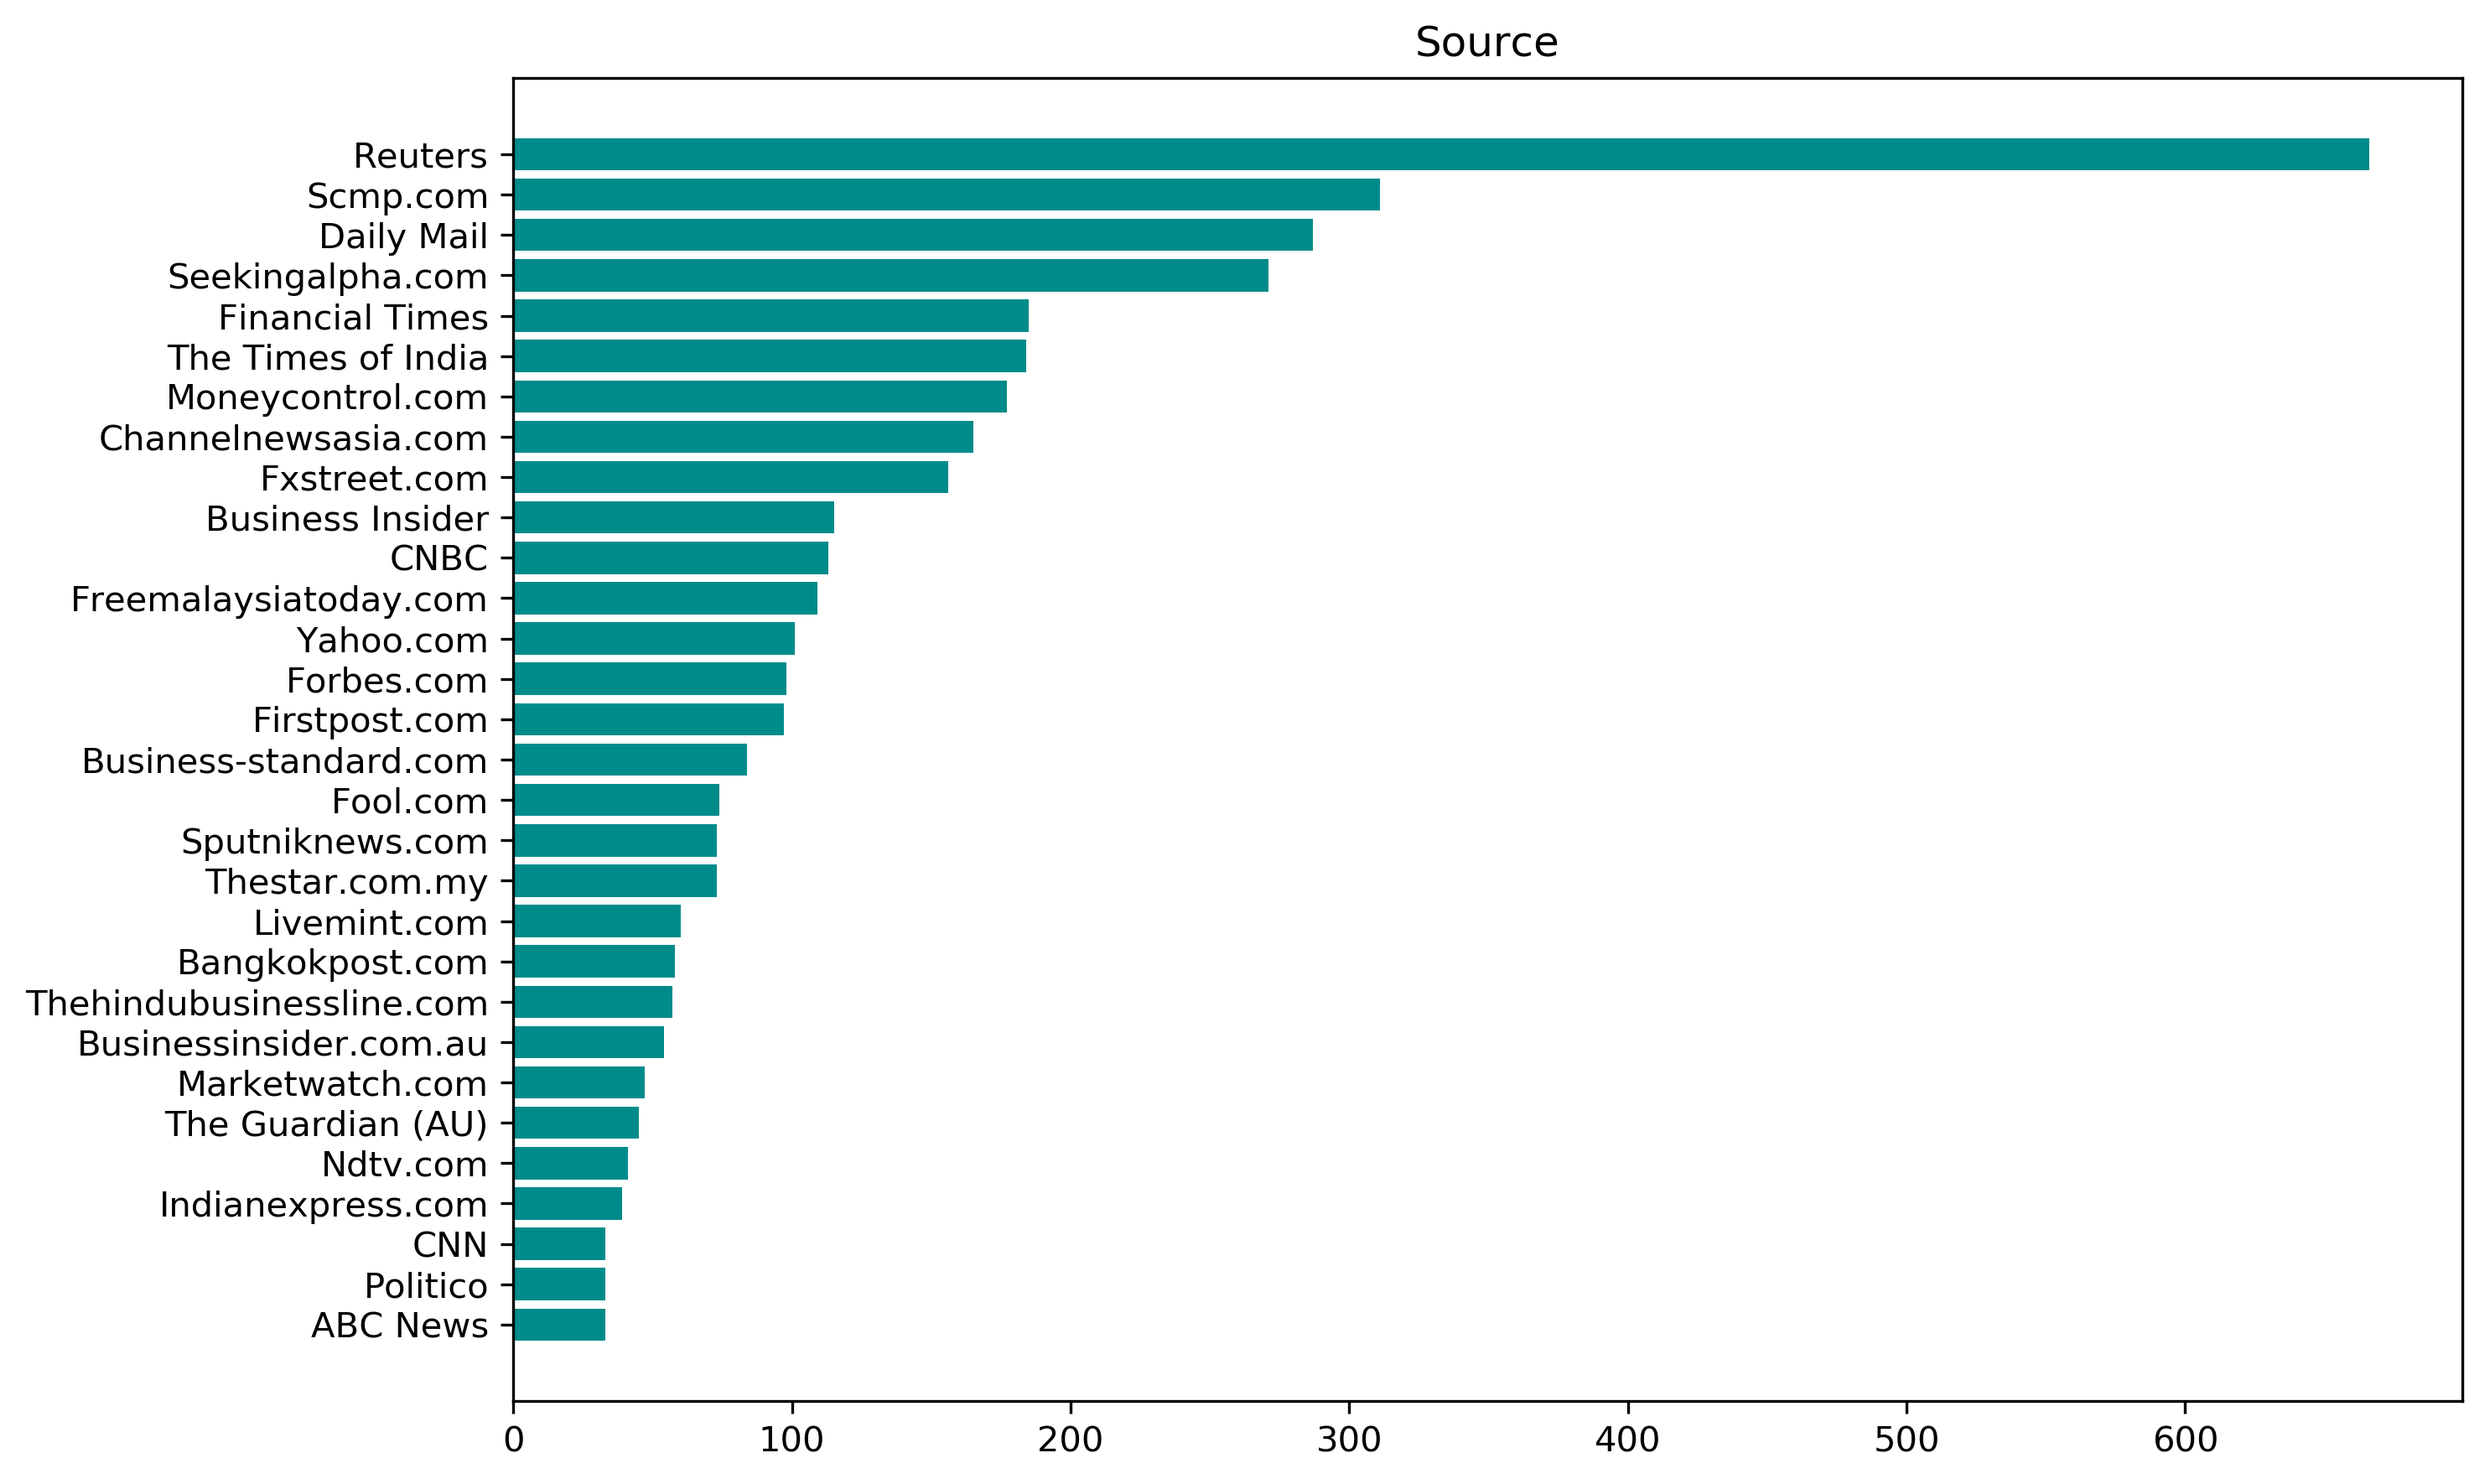

In [41]:
# Plot top 30 news sources in terms of number of articles published
plt.figure(figsize=(10,6), dpi=300)
source_counts = df.source.value_counts()[30:0:-1]
plt.barh(source_counts.index, source_counts,color='darkcyan')
plt.title('Source')
plt.tight_layout();

### Document Cleaning for Full Articles

In [42]:
df_content = pd.read_csv('data/full_content(full).csv')

In [43]:
df_content.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
# Remove \n in each article and truncate the article into 2000 words
def clean_content(doc):
    doc = re.sub('\\n','',doc)
    doc = ' '.join(doc.split()[:2000])
    return doc

In [45]:
non_null = df_content.full_content.isna() == False

In [46]:
df_content.loc[non_null,'full_content'] = df_content[non_null]['full_content'].apply(clean_content)

In [47]:
df.loc[:,'content'] = df_content.loc[:,'full_content']

In [48]:
df.head()

content  \
0  5 Min ReadSHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for booming jet demand. The biennial Airshow China, to be held in the coastal city of Zhuhai during Nov 6-11, is traditionally an event for Beijing to parade its growing aviation prowess in front of aerospace executives, diplomats and arms buyers from over 40 countries. But analysts say they are not expecting many headline announcements or big deals this year as a bruising trade war between Beijing and Washington and a slowing Chinese economy cause companies to be cautious. While the tarmac will be filled with planes from the likes of Airbus SA (AIR.PA) and Embraer (EMBR3.SA), the main symbol of China’s own commercial aviation ambitions, the Commercial Aircraft Corp of China’s (COMAC) [CMAFC.UL] C919 narrowbody jet, will not be there. A senior executive said it was undergoing test flights. Boeing Co (BA.N), which is opening a 737 completion plant in China, will not display any of its planes but only models at its exhibition stand. “We’re not expecting a big turnout this year,” said Chinese aviation expert Li Xiaojin. “As you know the Chinese economy is not doing great this year, so companies that would normally send 10 people will only send five instead.” China has become a key hunting ground for foreign firms to do deals as its airlines have expanded fleets to keep up with surging travel demand, putting the country in a position to overtake the United States as the world’s top aviation market in the next decade. But China’s economic growth has weakened to its slowest pace since the financial crisis and its relations with other countries have been tested by Beijing’s ambitions to grow its own domestic champions in industries such as aviation. And while U.S.-made aircraft have so far escaped Beijing’s tariffs, analysts said they were still waiting to see what the trade war would spell for U.S. companies such as Boeing, Honeywell (HON.N) and Gulfstream, who face fierce competition in China from the likes of Airbus and other suppliers. The United States exported $16.3 billion of civilian aircraft to China in 2017, the biggest category of goods it exported to China, according to a paper published by the Federal Reserve Bank of St. Louis. “It is not unlikely that China might strategically steer future aircraft purchases to Airbus rather than Boeing,” said Marc Szepan, a China aviation expert at the University of Oxford and former industry executive.” “In addition, there might be a re-evaluation of the relative attractiveness of industrial partners for China’s future aircraft programs such as the CR929 which might favor European over U.S. component and structures suppliers.” So far, Beijing has avoided showing its hand in either direction as deals by Chinese leasing firms to buy foreign aircraft are either pushed back or kept private. Recent U.S. allegations in court filings that Chinese intelligence attempted to steal information on a French-U.S. turbofan engine developed for commercial jetliners - a clear reference to the Safran-General Electric LEAP (SAF.PA) (GE.N) - could further fray relations, analysts said. Beijing has also criticized the U.S. decision not to send senior officials to a Shanghai import expo that takes place in the same week as the airshow and counts as one of China’s most important foreign policy events for the year. “Right now the political winds are quite concerning,” said aerospace analyst Richard Aboulafia of the Teal Group. U.S. President Donald Trump said on Friday that he will likely make a deal with China on trade, adding that a lot of progress had been made to resolve the two countries’ differences but warning that he still may impose more tariffs on Chinese goods. China is expected to put on a show of strength in space and defense,

In [49]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 6 columns):
content         5891 non-null object
description     5891 non-null object
source          5891 non-null object
title           5891 non-null object
url             5891 non-null object
publish_date    5891 non-null object
dtypes: object(6)
memory usage: 276.2+ KB


In [51]:
df.head(2)

content  \
0  5 Min ReadSHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for booming jet demand. The biennial Airshow China, to be held in the coastal city of Zhuhai during Nov 6-11, is traditionally an event for Beijing to parade its growing aviation prowess in front of aerospace executives, diplomats and arms buyers from over 40 countries. But analysts say they are not expecting many headline announcements or big deals this year as a bruising trade war between Beijing and Washington and a slowing Chinese economy cause companies to be cautious. While the tarmac will be filled with planes from the likes of Airbus SA (AIR.PA) and Embraer (EMBR3.SA), the main symbol of China’s own commercial aviation ambitions, the Commercial Aircraft Corp of China’s (COMAC) [CMAFC.UL] C919 narrowbody jet, will not be there. A senior executive said it was undergoing test flights. Boeing Co (BA.N), which is opening a 737 completion plant in China, will not display any of its planes but only models at its exhibition stand. “We’re not expecting a big turnout this year,” said Chinese aviation expert Li Xiaojin. “As you know the Chinese economy is not doing great this year, so companies that would normally send 10 people will only send five instead.” China has become a key hunting ground for foreign firms to do deals as its airlines have expanded fleets to keep up with surging travel demand, putting the country in a position to overtake the United States as the world’s top aviation market in the next decade. But China’s economic growth has weakened to its slowest pace since the financial crisis and its relations with other countries have been tested by Beijing’s ambitions to grow its own domestic champions in industries such as aviation. And while U.S.-made aircraft have so far escaped Beijing’s tariffs, analysts said they were still waiting to see what the trade war would spell for U.S. companies such as Boeing, Honeywell (HON.N) and Gulfstream, who face fierce competition in China from the likes of Airbus and other suppliers. The United States exported $16.3 billion of civilian aircraft to China in 2017, the biggest category of goods it exported to China, according to a paper published by the Federal Reserve Bank of St. Louis. “It is not unlikely that China might strategically steer future aircraft purchases to Airbus rather than Boeing,” said Marc Szepan, a China aviation expert at the University of Oxford and former industry executive.” “In addition, there might be a re-evaluation of the relative attractiveness of industrial partners for China’s future aircraft programs such as the CR929 which might favor European over U.S. component and structures suppliers.” So far, Beijing has avoided showing its hand in either direction as deals by Chinese leasing firms to buy foreign aircraft are either pushed back or kept private. Recent U.S. allegations in court filings that Chinese intelligence attempted to steal information on a French-U.S. turbofan engine developed for commercial jetliners - a clear reference to the Safran-General Electric LEAP (SAF.PA) (GE.N) - could further fray relations, analysts said. Beijing has also criticized the U.S. decision not to send senior officials to a Shanghai import expo that takes place in the same week as the airshow and counts as one of China’s most important foreign policy events for the year. “Right now the political winds are quite concerning,” said aerospace analyst Richard Aboulafia of the Teal Group. U.S. President Donald Trump said on Friday that he will likely make a deal with China on trade, adding that a lot of progress had been made to resolve the two countries’ differences but warning that he still may impose more tariffs on Chinese goods. China is expected to put on a show of strength in space and defense,

In [52]:
df.to_csv('data/article_info_cleaned.csv')

### Tokenization

In [53]:
from textblob import TextBlob

from collections import Counter
from operator import itemgetter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
more_stopwords = [
    'trade',
    'war',
    'tariffs',
    'us',
    'amid',
    'chinese',
    'china',
    'president',
    'donald',
    'trump',
    'united',
    'states',
    'could',
    'year',
    'reuters',
    'news',
    'xi',
    'jinping',
    'beijing',
    'washington'
]

In [55]:
# A function preprocesses the text and tokenize it into a bag of words
def cleanup_doc(doc):
    # Replace punctuations with a white space
    doc = re.sub('[%s]' % re.escape(string.punctuation), ' ', doc)
    # Remove all words containing digits
    doc = re.sub('\w*\d\w*', ' ', doc)
    # Keep US as a special term
    doc = re.sub('U.S.', 'US', doc)
    # Change all words into lowercases
    doc = doc.lower()
    # Remove all non English characters
    doc = ' '.join(w for w in nltk.word_tokenize(doc) if w.isalpha())
    # Remove stopwords
    stop = stopwords.words('english')
    stop += more_stopwords
    stop = set(stop)
    doc = ' '.join(w for w in nltk.word_tokenize(doc) if w not in stop)
    
    return doc

In [56]:
# A function vectorizes the cleanup_doc function
def super_clean(collection):
    clean = []
    for c in collection:
        clean.append(cleanup_doc(c))
    return clean

In [57]:
content = df.title+' '+df.content

In [58]:
content = super_clean(content)

In [78]:
pd.DataFrame(content).to_csv('data/content.csv')

In [59]:
len(content)

5891

### Vectorization

In [60]:
# Initialze a count vectorizer
cv = CountVectorizer(
                                strip_accents='ascii',
                                max_df=0.1, 
                                min_df=3,
                                ngram_range=(1,2)    
                               )

In [61]:
X = cv.fit_transform(content)

In [62]:
X.toarray().shape

(5891, 171770)

In [63]:
# Initialze a tfidf vectorizer
tfidf = TfidfVectorizer(
    max_df=0.9,
    min_df=3,
    ngram_range=(1,2)
)

In [64]:
Xt = tfidf.fit_transform(content)

In [65]:
Xt.toarray().shape

(5891, 172416)

In [66]:
import dill

In [67]:
# Pickle the count vectorizer and tfidf vectorizer
dill.dump(cv, open('data/vectors/cv_full', 'wb'))
dill.dump(X, open('data/matrix/X_cv_full', 'wb'))
dill.dump(tfidf, open('data/vectors/tfidf_full', 'wb'))
dill.dump(Xt, open('data/matrix/X_tfidf_full', 'wb'))